In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tourpackageprediction/tour_package.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("../input/tourpackageprediction/tour_package.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
df.shape

(4888, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [6]:
df.Gender.unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

In [7]:
df.replace("Fe Male", "Female", inplace = True)

In [8]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [9]:
df.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

In [10]:
round(100*(df.isnull().sum() / len(df.index)), 2)

CustomerID                  0.00
ProdTaken                   0.00
Age                         4.62
TypeofContact               0.51
CityTier                    0.00
DurationOfPitch             5.14
Occupation                  0.00
Gender                      0.00
NumberOfPersonVisiting      0.00
NumberOfFollowups           0.92
ProductPitched              0.00
PreferredPropertyStar       0.53
MaritalStatus               0.00
NumberOfTrips               2.86
Passport                    0.00
PitchSatisfactionScore      0.00
OwnCar                      0.00
NumberOfChildrenVisiting    1.35
Designation                 0.00
MonthlyIncome               4.77
dtype: float64

In [11]:
df.dropna(axis = 0,inplace = True)

In [12]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [13]:
df.shape

(4128, 20)

In [14]:
cats = ['ProdTaken', 'CityTier', 'PreferredPropertyStar', 'Passport',
        'OwnCar', 'PitchSatisfactionScore', 'TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
        'MaritalStatus', 'Designation']
nums = ['CustomerID', 'Age', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups',
       'NumberOfTrips',
       'NumberOfChildrenVisiting', 'MonthlyIncome']

# univariate analysis for categorical columns


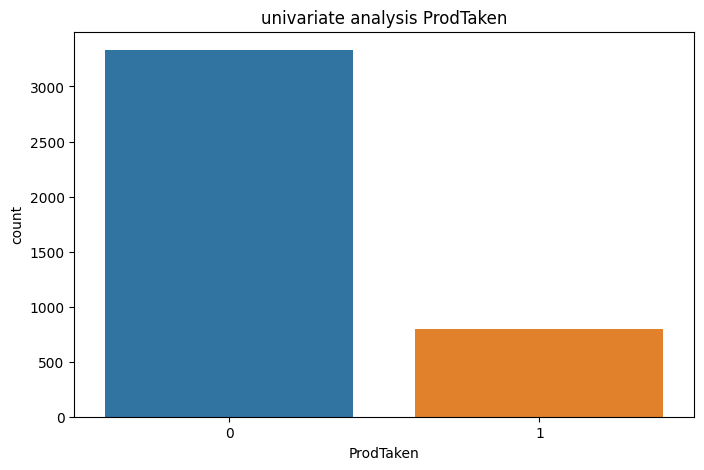

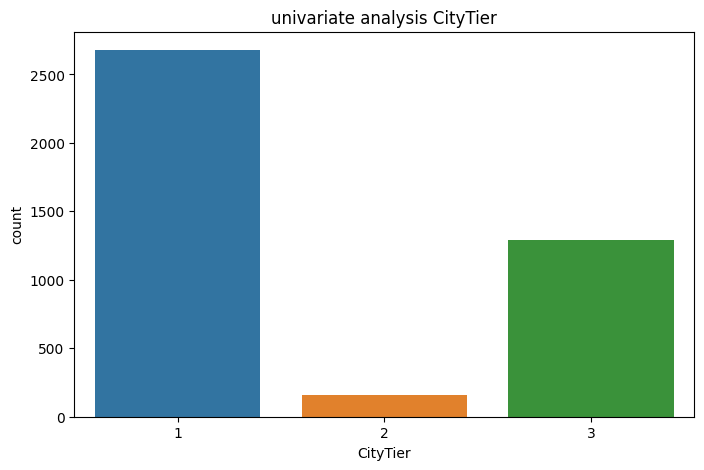

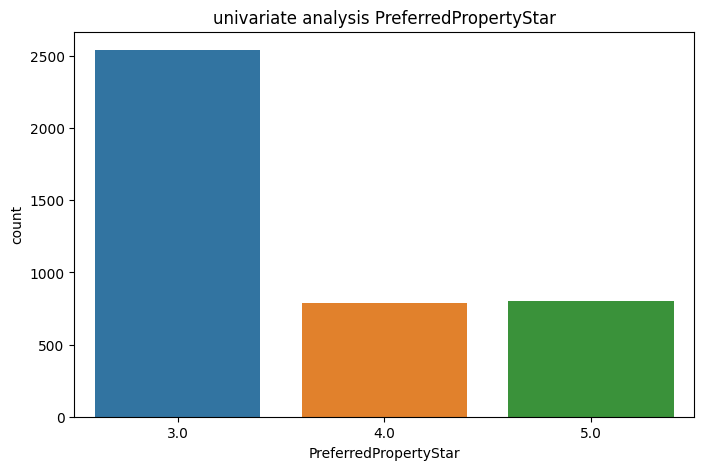

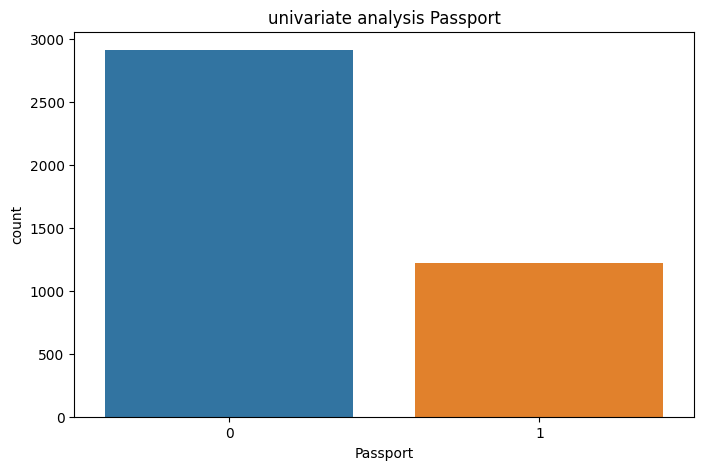

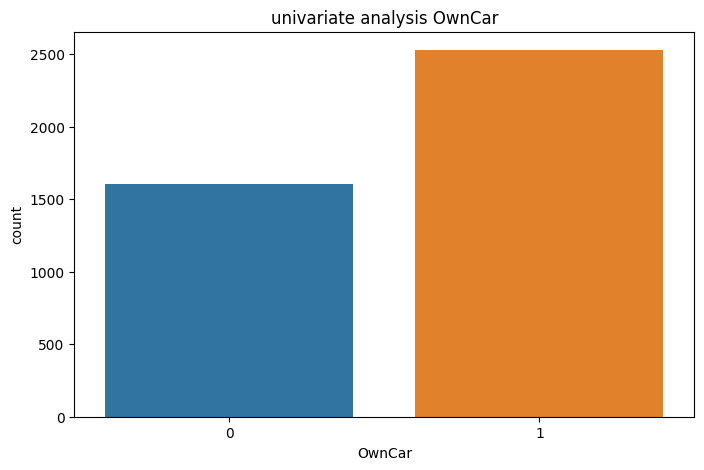

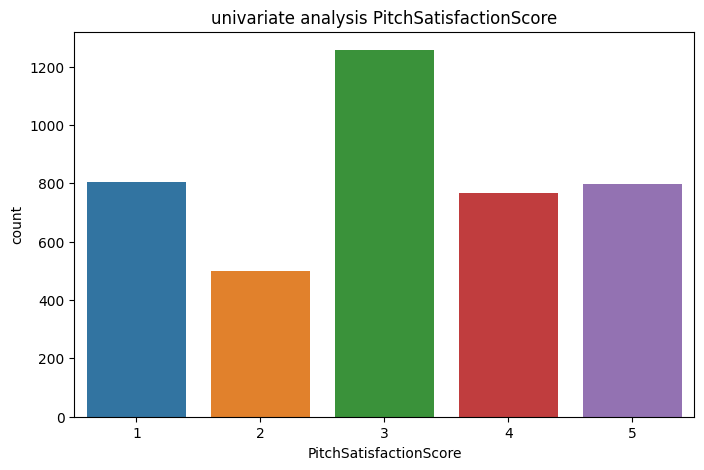

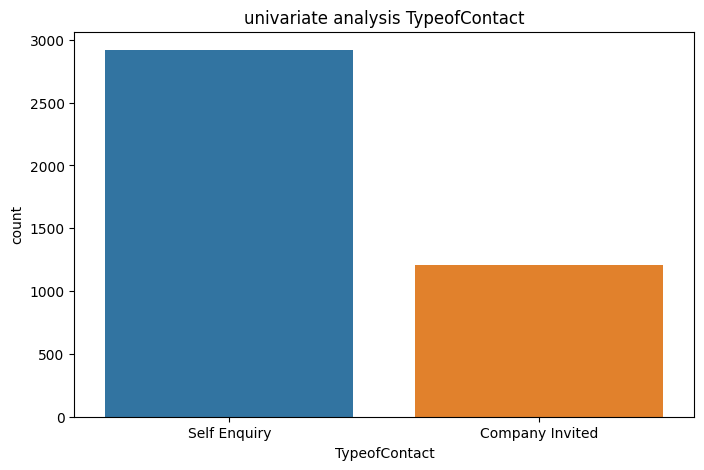

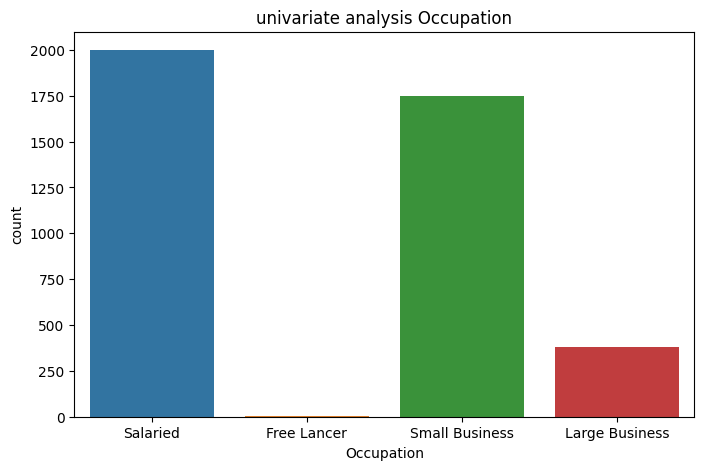

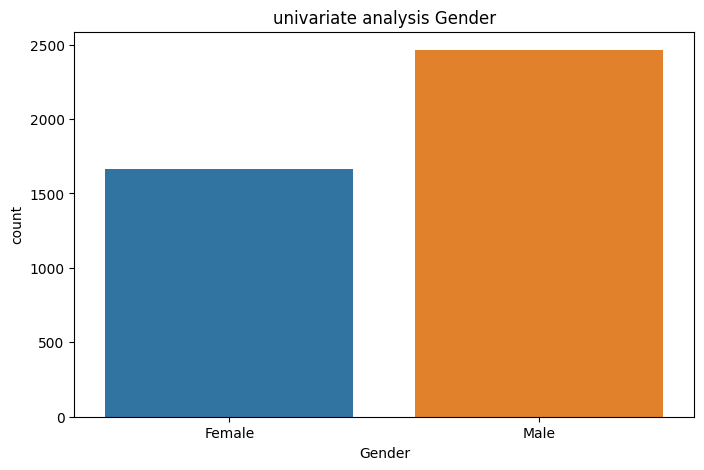

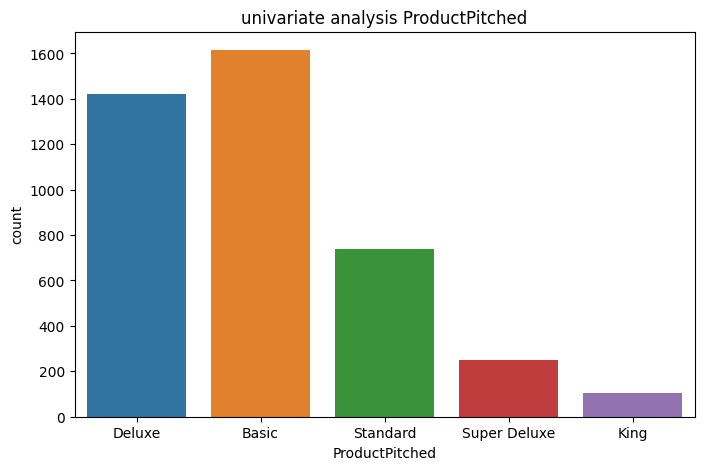

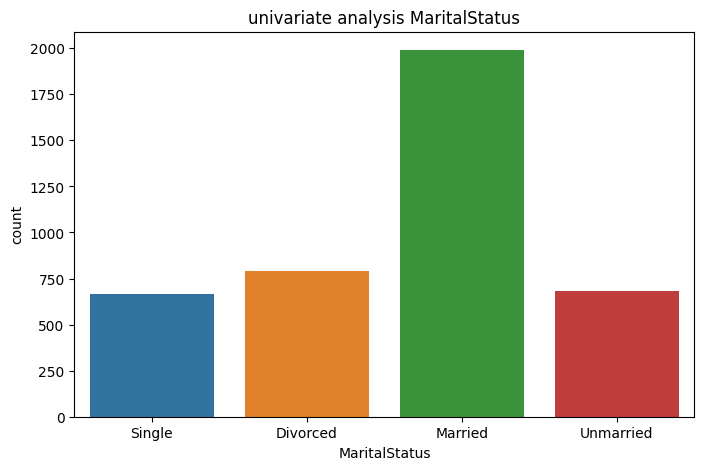

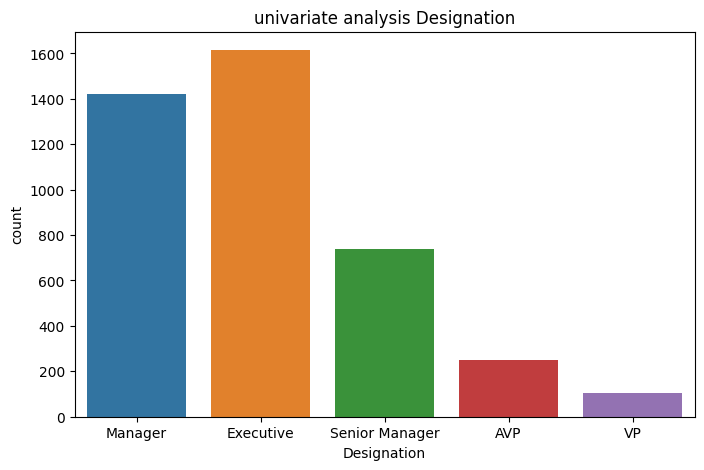

In [15]:
for col in cats:
    plt.figure(figsize = (8,5))
    sns.countplot(x = col, data = df)
    plt.title(f'univariate analysis {col}')
    plt.show()

# univariate analysis for numerical columns

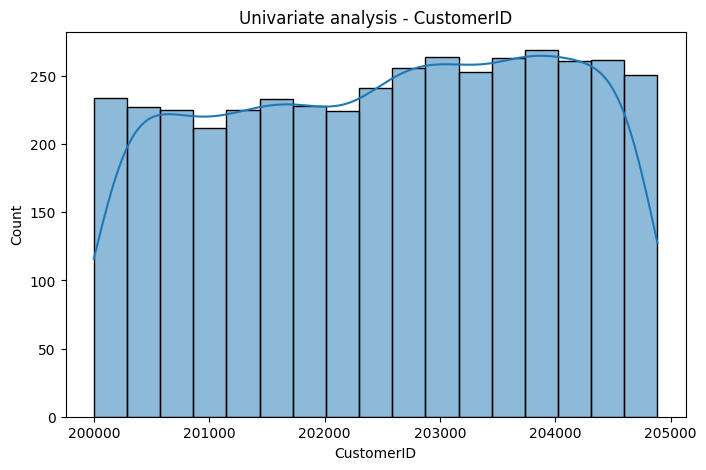

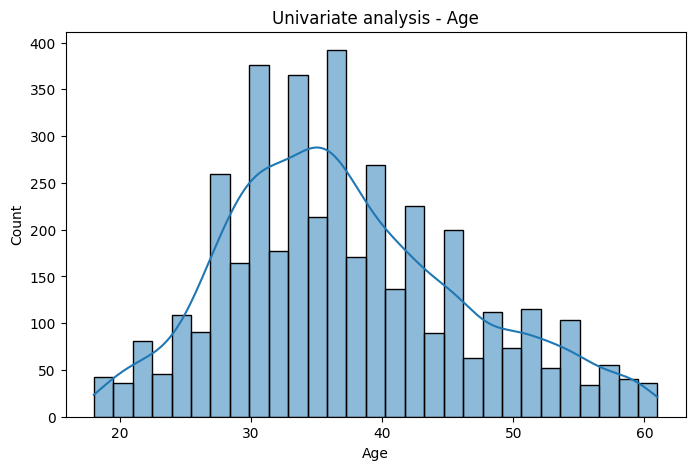

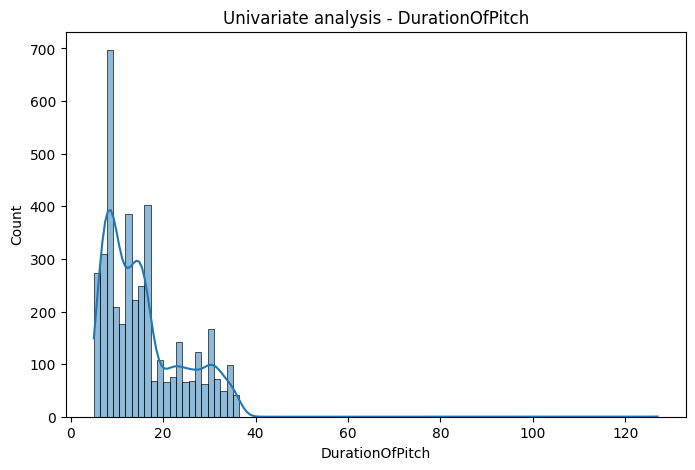

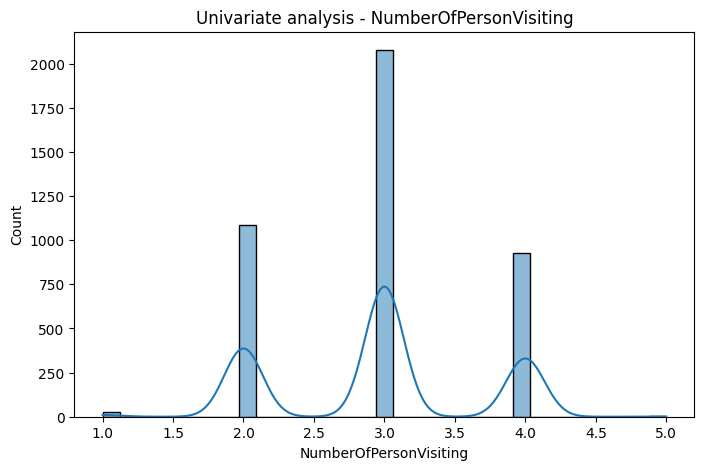

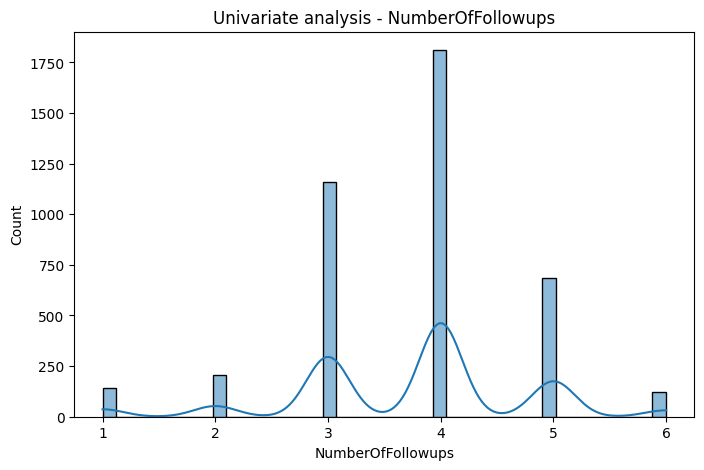

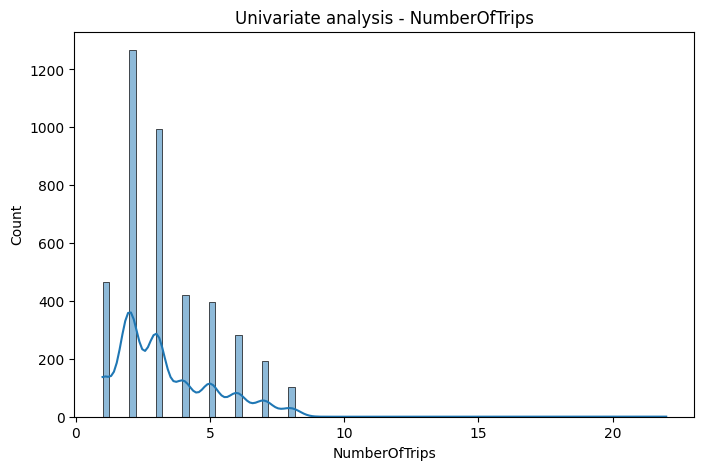

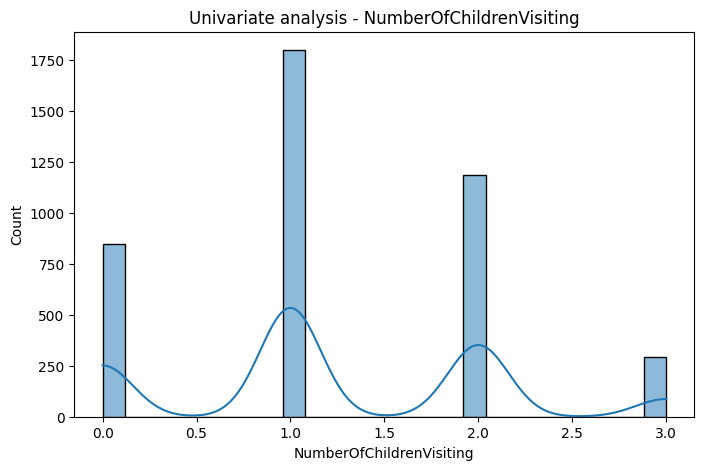

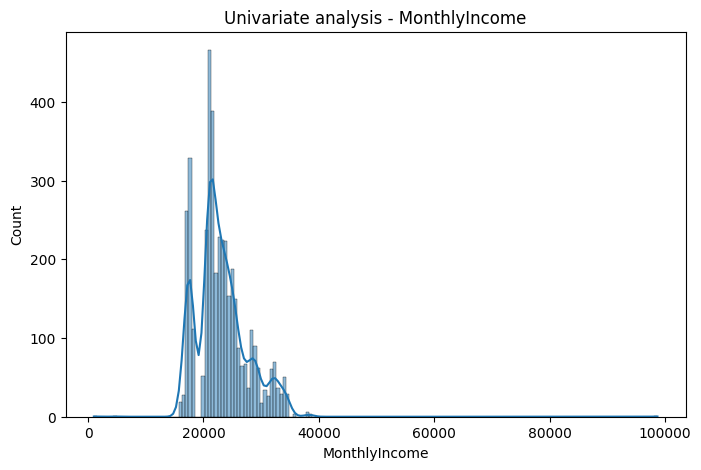

In [16]:
for col in nums:
    plt.figure(figsize = (8,5))
    sns.histplot(df[col], kde = True)
    plt.title(f'Univariate analysis - {col}')
    plt.show()

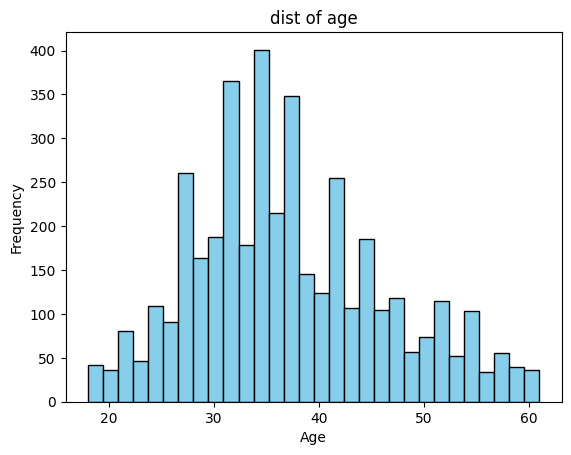

In [17]:
plt.hist(df['Age'].dropna(), bins = 30, color = 'skyblue', edgecolor = 'black')
plt.title("dist of age")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

*insight - 30-40 agr group are travelling more*

<Axes: xlabel='TypeofContact', ylabel='count'>

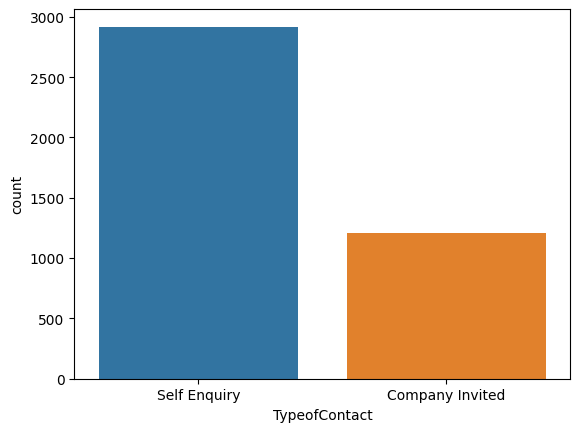

In [18]:
sns.countplot(x= 'TypeofContact', data=df)

In [19]:
df.CityTier.unique()

array([3, 1, 2])

In [20]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4128.0,202527.763808,1409.439133,200000.0,201320.75,202603.5,203748.25,204887.0
Age,4128.0,37.231831,9.174521,18.0,31.00,36.0,43.00,61.0
DurationOfPitch,4128.0,15.584787,8.398142,5.0,9.00,14.0,20.00,127.0
NumberOfPersonVisiting,4128.0,2.949370,0.718818,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4128.0,3.741521,1.006786,1.0,3.00,4.0,4.00,6.0
NumberOfTrips,4128.0,3.295300,1.856300,1.0,2.00,3.0,4.00,22.0
NumberOfChildrenVisiting,4128.0,1.223595,0.852685,0.0,1.00,1.0,2.00,3.0
MonthlyIncome,4128.0,23178.464147,4506.614622,1000.0,20751.00,22418.0,25301.00,98678.0


In [21]:
df[cats].describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4128.0,0.193072,0.394757,0.0,0.0,0.0,0.0,1.0
CityTier,4128.0,1.663275,0.920640,1.0,1.0,1.0,3.0,3.0
PreferredPropertyStar,4128.0,3.578488,0.795031,3.0,3.0,3.0,4.0,5.0
Passport,4128.0,0.295300,0.456233,0.0,0.0,0.0,1.0,1.0
OwnCar,4128.0,0.612161,0.487317,0.0,0.0,1.0,1.0,1.0
PitchSatisfactionScore,4128.0,3.060804,1.363064,1.0,2.0,3.0,4.0,5.0


In [22]:
#To make sure categorical column is treated as categorical, 
#converted to object as made bifurcation of cat num columns manually
df[cats] = df[cats].astype('object')

In [23]:
df[cats].describe().T

,count,unique,top,freq
ProdTaken,4128,2,0,3331
CityTier,4128,3,1,2678
PreferredPropertyStar,4128.0,3.0,3.0,2541.0
Passport,4128,2,0,2909
OwnCar,4128,2,1,2527
PitchSatisfactionScore,4128,5,3,1257
TypeofContact,4128,2,Self Enquiry,2918
Occupation,4128,4,Salaried,1999
Gender,4128,2,Male,2463
ProductPitched,4128,5,Basic,1615


In [24]:
for i in df[cats].columns:
    x = df[i].unique()
    print(f'{i}:{x}')
    print()

ProdTaken:[1 0]

CityTier:[3 1 2]

PreferredPropertyStar:[3.0 4.0 5.0]

Passport:[1 0]

OwnCar:[1 0]

PitchSatisfactionScore:[2 3 5 4 1]

TypeofContact:['Self Enquiry' 'Company Invited']

Occupation:['Salaried' 'Free Lancer' 'Small Business' 'Large Business']

Gender:['Female' 'Male']

ProductPitched:['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']

MaritalStatus:['Single' 'Divorced' 'Married' 'Unmarried']

Designation:['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']



# Bi-variate analysis

<Axes: xlabel='Age', ylabel='DurationOfPitch'>

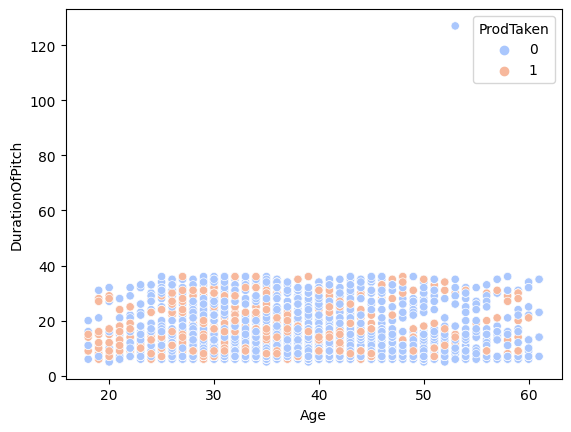

In [25]:
sns.scatterplot(x = 'Age', y = 'DurationOfPitch', data = df, hue = 'ProdTaken', palette = 'coolwarm')

<Axes: xlabel='MaritalStatus'>

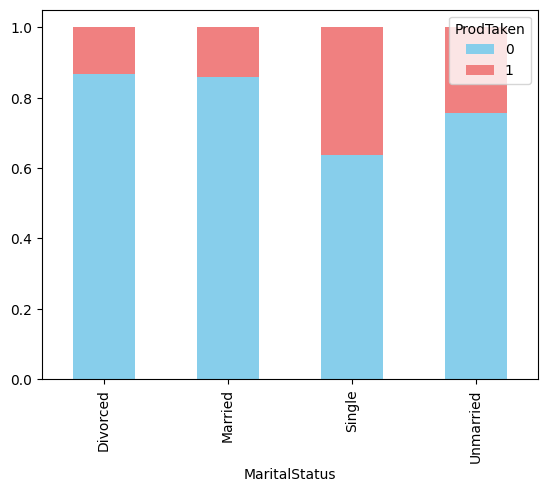

In [26]:
cross_tab = pd.crosstab(df['MaritalStatus'], df['ProdTaken'], normalize = 'index') #normalize gives percentage


cross_tab.plot(kind = 'bar', stacked = True, color = ['skyblue', 'lightcoral'])

<Axes: xlabel='ProductPitched', ylabel='PitchSatisfactionScore'>

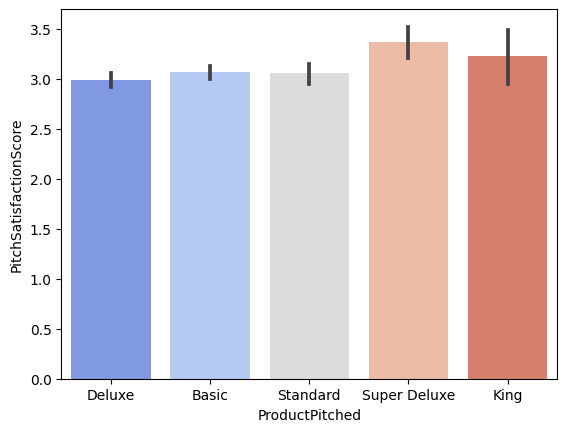

In [27]:
sns.barplot(x = 'ProductPitched', y = 'PitchSatisfactionScore', data=df, palette = 'coolwarm')

<Axes: xlabel='NumberOfFollowups', ylabel='PitchSatisfactionScore'>

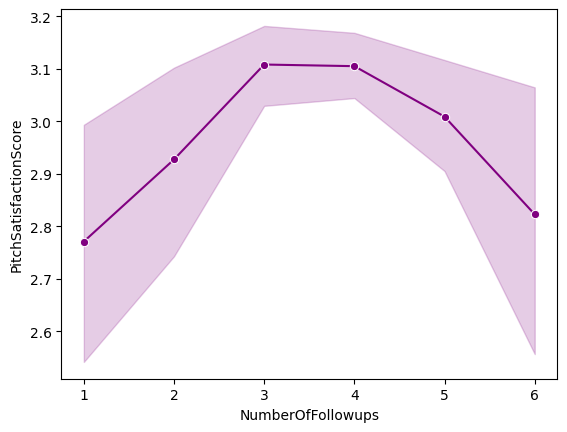

In [28]:
sns.lineplot(x = 'NumberOfFollowups', y = 'PitchSatisfactionScore', data = df, marker = 'o', color = 'purple')

# multivariate analysis

<Axes: xlabel='ProdTaken', ylabel='Age'>

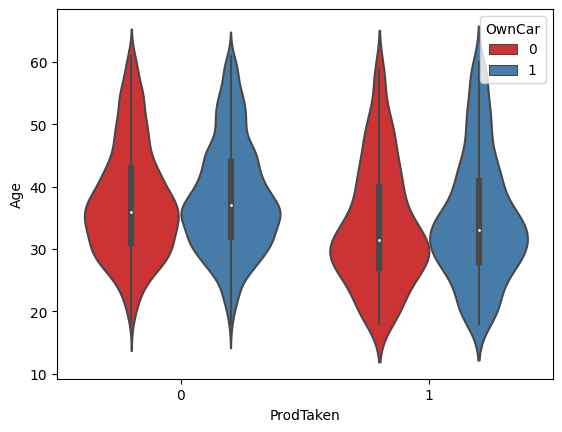

In [29]:
sns.violinplot(x = 'ProdTaken', y='Age', data=df, hue = 'OwnCar', palette = 'Set1')

<Axes: xlabel='Gender', ylabel='Age'>

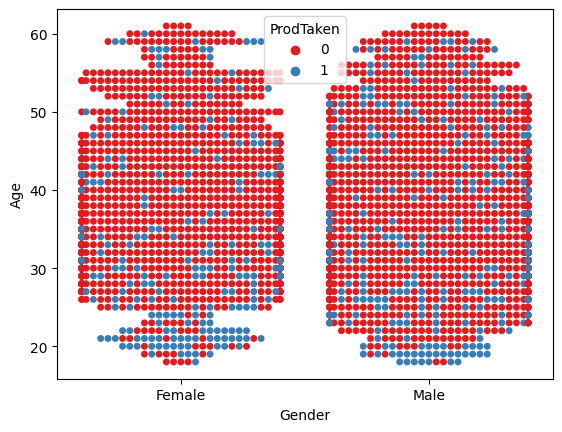

In [30]:
sns.swarmplot(x = 'Gender', y='Age', data=df, hue = 'ProdTaken', palette = 'Set1')

# feature engineering

In [31]:
df.drop('CustomerID', inplace=True, axis = 1)

In [32]:
df['TotalVisiting'] = df['NumberOfPersonVisiting'] +df['NumberOfChildrenVisiting']

In [33]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print("Number of Numerical Features are: ", len(num_features))

Number of Numerical Features are:  8


In [34]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Number of Categorical Features are: ", len(cat_features))

Number of Categorical Features are:  12


In [35]:
discrete_features = [feature for feature in num_features if len(df[feature].unique()) <= 25]
print("Number of Discrete Features are: ", len(discrete_features))

Number of Discrete Features are:  5


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = df.drop('ProdTaken', axis =1)
y = df['ProdTaken']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [39]:
X_train.shape, X_test.shape

((3302, 19), (826, 19))